## Deep Dive into Sentiment Analysis of Twitter Data 

### Notebook 1:- Data Visualization and Cleaning

#### Importing Libraries 

In [1]:
# importing necessary libraries and packages


#Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to work with regular expression
import re
import 

# NLP related libraries and packages
import nltk


#


In [3]:
# new libraries that needs to be imported 
import nltk


#### Data Loading

Following data has been downloaded from [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140/data)

In [4]:
# import dataset from kaggle
dataset_tweets = pd.read_csv("./dataset/training.1600000.processed.noemoticon.csv",encoding = 'ISO-8859-1',
                             names=['target', 'ids', 'date', 'flag','user', 'text'])

#Viewing 20 samples of the dataset_tweets
dataset_tweets.sample(20)

,target,ids,date,flag,user,text
951585,4,1824268802,Sun May 17 00:40:42 PDT 2009,NO_QUERY,ianthemalenurse,&quot;Tonight I will be miss Saigon&quot; from...
1054109,4,1961864114,Fri May 29 10:09:34 PDT 2009,NO_QUERY,quarksome,done for my lectures tomorrow at PAS monthly m...
419666,0,2062039397,Sat Jun 06 22:11:17 PDT 2009,NO_QUERY,smoothhead1,@donlemoncnn Sitting at home watching your rer...
552458,0,2203404732,Tue Jun 16 23:40:02 PDT 2009,NO_QUERY,babyblizz,Wonder when there's gonna be some decent weath...
868560,4,1677959697,Sat May 02 04:52:21 PDT 2009,NO_QUERY,barbarosa1,@ebuzz7090 Thanks again! Have a great WE!
624140,0,2229796725,Thu Jun 18 16:13:09 PDT 2009,NO_QUERY,mrf7985,O no! The movie theater lost power and we're t...
40275,0,1573745833,Tue Apr 21 02:39:36 PDT 2009,NO_QUERY,pezholio,Just created my first valid bit of JSON. Hurra...
1436483,4,2060994649,Sat Jun 06 19:58:43 PDT 2009,NO_QUERY,aielen,nice to see pgpg on twitter cos i love her ver...
1405255,4,2055165613,Sat Jun 06 08:49:20 PDT 2009,NO_QUERY,kelimorris,@weddingtidbits Thanks
124597,0,1834139774,Mon May 18 01:46:57 PDT 2009,NO_QUERY,sherrie_cake,"@Boo2AGoose piercings. nopeeee, i havent been..."


In [10]:
# checking for null values in the dataset_tweets
dataset_tweets.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [5]:
# get the complete meta data info about the dataset_tweets
dataset_tweets.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 556.1 MB


Data regarding the tweets currently have following 6 columns (target, ids, date, flag, user, text) with no null values present. In total we have 1600000 entries or different tweets observation in the dataset for the analysis.

#### Dropping Unnecessary columns/ Data Cleaning

Currently we only need tweets in text column and target column to train and analyze the dataset. Hence, we will be removing other columns from the dataset_tweets. 

In [6]:
# remove unnecessary columns
dataset_tweets.drop(labels =['ids', 'date', 'flag', 'user'], axis = 1, inplace = True)
dataset_tweets.head(5)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Checking for unique values in target column
print(dataset_tweets.target.unique())
print(dataset_tweets.target.nunique())

[0 4]
2


We only have 2 unique values in target column that is 0-> Negative and 4-> Positive. We will replace 4 with 1 for ease of understanding and working with the dataset.

In [8]:
dataset_tweets['target'] = dataset_tweets['target'].replace(4,1)
print(dataset_tweets.target.unique())

[0 1]


In [9]:
# Viewing target == 0 i.e Negative Tweets
dataset_tweets[dataset_tweets['target']==0].text.sample(5)

695488    NICE! the 3.0 jailbreak is out (mac only) too ...
287741    @digital_idiot Sony's gonna suck.  MS's announ...
388707      @jasmc1 je or cc, more likely je tho  *JohnnyV*
170203    @Xaan I'm having trouble viewing it as well on...
358659    i want to go home and sleep in my warm bed... ...
Name: text, dtype: object

In [10]:
# Similarly viewing target ==1 i.e Positive tweets
dataset_tweets[dataset_tweets['target']==1].text.sample(5)

1219123    @childrensjewell thanks for following me back,...
913222     only got 22.90 in tips last night.. (N) but he...
1547754    Just saw the Dantes Inferno Developer Diary Tr...
949209     @v_cub LOL... That's so cute!!!! CONGRATULATIO...
1542261    @JonathanAB HUGELY!!!! lol  &amp; @GrantNash s...
Name: text, dtype: object

In [31]:
# Count the occurance of Negative and Positive tweets in dataset_tweets
dataset_tweets.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

We have equal occurance of each Positive and Negative Tweets in the dataset.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

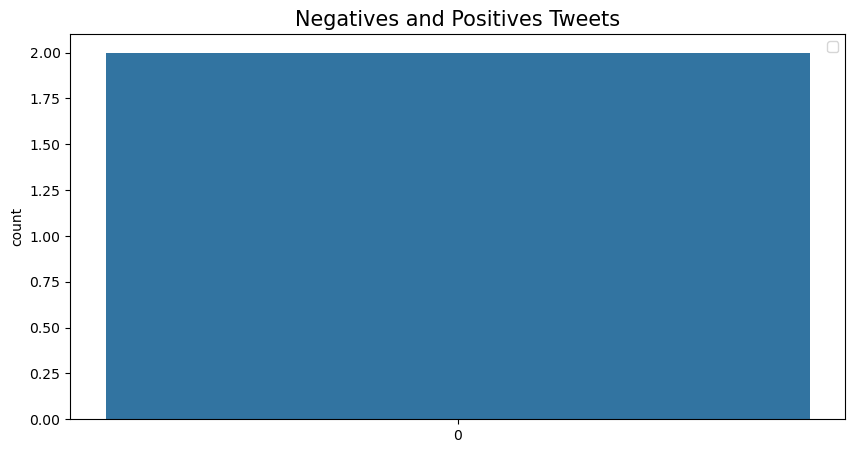

In [20]:
# work on this visualization 
###### Pending

plt.figure(figsize = (10,5))
sns.countplot(dataset_tweets['target'].value_counts())
plt.xticks()
plt.legend()
plt.title("Negatives and Positives Tweets",fontsize =15)
plt.plot()

### Preprocessing the data 

# Experiments

In [90]:
def remove_username(text):
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"&\w+","",text)
    text = re.sub(r"\shttp\S+","",text)
    return text

In [91]:
# Tokenization experiment
text_1 = dataset_tweets['text'][0]
print(text_1)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [92]:
print(remove_username(text_1))

 - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
